In [21]:
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import cv2
import numpy as np
import imutils
import random
import pickle

In [30]:
import shutil
import os

ROOT_DIR = Path.cwd().parent
ensemble_A = Path(ROOT_DIR, 'EnsembleA_H2020')
shape_dir = ['Cercles', 'Diamants', 'Hexagones', 'Triangles']
paths_A = []
paths_B = []

for shape in shape_dir:
    # map les path de ensemble A
    paths_A = [Path(ensemble_A, shape, f'{shape[:-1]}{i}') for i in [2,3,4,5]]

    # clean l'ensemble B
    # if os.path.exists(ROOT_DIR):
    #     shutil.rmtree('/path/to/your/dir/')
    # creer les dirs pour ensemble B
    paths_B = [Path(ROOT_DIR, 'EnsembleB_H2020', shape, f'{shape[:-1]}{i}').mkdir(parents=True, exist_ok=True) for i in [2,3,4,5]]

# for shape in ['Cercles', 'Diamants', 'Hexagones', 'Triangles']:
#     for i in [2,4]:
#         Path(ROOT_DIR, 'EnsembleB_H2020', shape, f'{shape[:-1]}{i}').mkdir(parents=True, exist_ok=True)

TypeError: can only concatenate str (not "property") to str

In [23]:
def walk_shapes(shape_dir):
    import os

    paths = [Path(ensemble_A, shape_dir, f'{shape_dir[:-1]}{i}') for i in [2,4]]

    sub_shapes = dict()
    for p in paths:
        img = []
        for root, dirs, files in os.walk(str(p)):
            [img.append(f'{p}/{f}') for f in files]
        sub_shapes.update({p.name: img})

    return sub_shapes

In [24]:
def detect_shape(contour):
    # initialize the shape name and approximate the contour
    shape = "unidentified"
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * peri, True)

    # if the shape is a triangle, it will have 3 vertices
    if len(approx) == 3:
        shape = "triangle"

    # if the shape has 4 vertices, it is either a square or
    # a rectangle
    elif len(approx) == 4:
        # compute the bounding box of the contour and use the
        # bounding box to compute the aspect ratio
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)

        # a square will have an aspect ratio that is approximately
        # equal to one, otherwise, the shape is a rectangle
        shape = "square" if ar >= 0.95 and ar <= 1.05 else "diamond"

    # if the shape is a pentagon, it will have 5 vertices
    elif len(approx) == 5:
        shape = "hexagon"

    # otherwise, we assume the shape is a circle
    else:
        shape = "circle"

    # return the name of the shape
    return shape

Cercle2
/home/julien/Projects/ETS/LOG635-LABO1-EQ5/EnsembleA_H2020/Cercles/Cercle2/310_Cercle2.jpg
/home/julien/Projects/ETS/LOG635-LABO1-EQ5/EnsembleA_H2020/Cercles/Cercle2/80_Cercle2.jpg
/home/julien/Projects/ETS/LOG635-LABO1-EQ5/EnsembleA_H2020/Cercles/Cercle2/244_Cercle2.jpg
/home/julien/Projects/ETS/LOG635-LABO1-EQ5/EnsembleA_H2020/Cercles/Cercle2/65_Cercle2.jpg
/home/julien/Projects/ETS/LOG635-LABO1-EQ5/EnsembleA_H2020/Cercles/Cercle2/288_Cercle2.jpg
/home/julien/Projects/ETS/LOG635-LABO1-EQ5/EnsembleA_H2020/Cercles/Cercle2/293_Cercle2.jpg
/home/julien/Projects/ETS/LOG635-LABO1-EQ5/EnsembleA_H2020/Cercles/Cercle2/114_Cercle2.jpg
/home/julien/Projects/ETS/LOG635-LABO1-EQ5/EnsembleA_H2020/Cercles/Cercle2/79_Cercle2.jpg
/home/julien/Projects/ETS/LOG635-LABO1-EQ5/EnsembleA_H2020/Cercles/Cercle2/166_Cercle2.jpg
/home/julien/Projects/ETS/LOG635-LABO1-EQ5/EnsembleA_H2020/Cercles/Cercle2/175_Cercle2.jpg
/home/julien/Projects/ETS/LOG635-LABO1-EQ5/EnsembleA_H2020/Cercles/Cercle2/188_Cercle

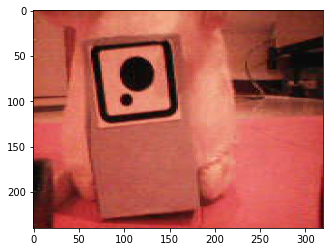

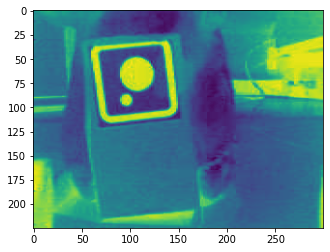

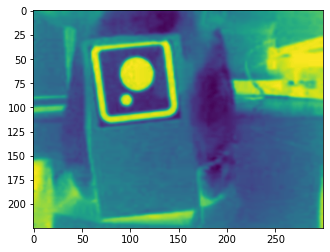

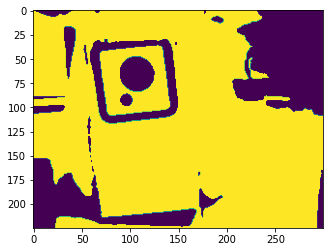

AttributeError: 'NoneType' object has no attribute 'shape'

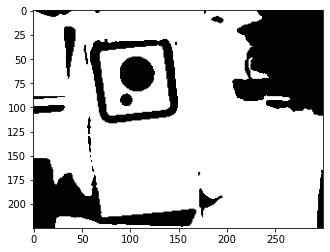

In [25]:
images_path = {}
for shape in ['Cercles', 'Diamants', 'Hexagones', 'Triangles']:
    imgs = walk_shapes(shape)
    images_path.update({shape: imgs})

#     print(images_path.items())
for key,value in images_path["Cercles"].items():
    print(key)
#     for(i=0;i<len(value);i++):
    for imagePath in value:
        print(imagePath)

# values_view = images_path["Cercles"].values()
# value_iterator = iter(values_view)
# first_value = next(value_iterator)

print(images_path["Cercles"]["Cercle2"][0])

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(images_path["Cercles"]["Cercle2"][251])
imgplot = plt.imshow(img)
plt.show()


# # To redimension images
# from PIL import Image

# basewidth = 160
# img2 = Image.open(images_path["Cercles"]["Cercle2"][0])
# wpercent = (basewidth / float(img2.size[0]))
# hsize = int((float(img2.size[1]) * float(wpercent)))
# img2resized = img2.resize((basewidth, hsize), Image.ANTIALIAS)
# imgplot = plt.imshow(img2)
# plt.show()


# load the image and resize it to a smaller factor so that
# the shapes can be approximated better
image = cv2.imread(images_path["Cercles"]["Cercle2"][251])
bitwise = cv2.bitwise_not(image)
resized = imutils.resize(bitwise, width=300)
ratio = image.shape[0] / float(resized.shape[0])

#  https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html
# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 160, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)[1]

imgplot = plt.imshow(gray)
plt.show()

imgplot = plt.imshow(blurred)
plt.show()

imgplot = plt.imshow(thresh)
plt.show()

plt.imshow(thresh, cmap='gray')
# img.save('resized_image.jpg')

# WILL NEED TO EXTRACT IMAGE BEFORE FINDING FEATURES

# I dont like this methode because the template needs to be the same
# # https://www.youtube.com/watch?v=0gyl7VYGgs8&ab_channel=Pysource
# h, w= thresh.shape
# print('width:  ', w)
# print('height: ', h)

# # img = cv2.imread(images_path["Cercles"]["Cercle2"][1],0)
img = gray
# template = cv2.imread('C:\\Users\\Seb\Desktop\\LOG635\labo1\\resources\\markers\\C2.jpg',cv2.IMREAD_GRAYSCALE)
template = cv2.imread('C:\\Users\\Seb\Desktop\\LOG635\labo1\\resources\\markers\\C2.jpg',cv2.IMREAD_GRAYSCALE)
from skimage import color
# grayTemplate = color.rgb2gray(template)
w,h = img.shape[::-1]
baseTemplateWidth = int(w/2)
i=0
boolMatched = False
templateRotation=0
im_crop=0

while(templateRotation < 350 ):
    
    rotatedTemplate = imutils.rotate(template, angle=templateRotation)
#     imgplot = plt.imshow(rotatedTemplate)
#     plt.show()
    templateRotation=templateRotation+10
    
    while(i<baseTemplateWidth-40):
        if(boolMatched):
            break
        bitwise = cv2.bitwise_not(template)
        resized = imutils.resize(bitwise, width=baseTemplateWidth-i)

        w,h = resized.shape[::-1]
    #     imgplot = plt.imshow(resized)
    #     plt.show()

        i=i+20
        print("i: "+str(i))
        result = cv2.matchTemplate(img, resized, cv2.TM_CCOEFF_NORMED)
    #     print("result")
    #     imgplot = plt.imshow(result)
    #     plt.show()

        loc = np.where(result >= 0.5)

        for pt in zip(*loc[::-1]):
            print("WOW")
            boolMatched = True
            cv2.rectangle(img, pt, (pt[0]+ w, pt[1]+h), (0,255,0),3)
            print("pt[0] = "+str(pt[0]))
            print("pt[1] = "+str(pt[1]))

            im_crop = img[pt[1]:pt[1]+h, pt[0]:pt[0]+w]

            plt.show()
            break
        
        
# # https://www.youtube.com/watch?v=nnH55-zD38I&ab_channel=Murtaza%27sWorkshop-RoboticsandAI
# # Find number of similarities between 2 image. Image classifier
# # img2 = cv2.imread(images_path["Cercles"]["Cercle2"][1],0)
img2 = blurred
h, w= blurred.shape
print('width:  ', w)
print('height: ', h)
img1 = cv2.imread('C:\\Users\\Seb\Desktop\\LOG635\labo1\\resources\\markers\\C2.jpg',0)
bitwise = cv2.bitwise_not(img1)
resized = imutils.resize(bitwise, width=150)
img1 = resized

orb = cv2.ORB_create(nfeatures=1000)

kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

imgKp1 = cv2.drawKeypoints(img1,kp1,None)
imgKp2 = cv2.drawKeypoints(img2,kp2,None)

print(des1.shape)
print(des2.shape)

bruteForceMatcher = cv2.BFMatcher()
matches = bruteForceMatcher.knnMatch(des1,des2,k=2)

good=[]
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
        
        
print(len(good))

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

imgplot = plt.imshow(imgKp1)
plt.show()

imgplot = plt.imshow(imgKp2)
plt.show()

imgplot = plt.imshow(img3)
plt.show()
# cv2.imshow("Kp1",imgKp1)
# cv2.imshow("Kp2",imgKp2)



#  Method does not seem to work well
# # https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html#template-matching-in-opencv
# import cv2
# import numpy as np
# from matplotlib import pyplot as plt

# # img = cv2.imread(images_path["Cercles"]["Cercle2"][1],0)
# img = thresh
# img2 = img.copy()
# template = cv2.imread('C:\\Users\\Seb\Desktop\\LOG635\labo1\\resources\\markers\\C2.jpg',0)
# w, h = template.shape[::-1]
# print("template")
# imgplot = plt.imshow(template)
# plt.show()


# # All the 6 methods for comparison in a list
# methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
#             'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

# for meth in methods:
#     img = img2.copy()
#     method = eval(meth)

#     # Apply template Matching
#     res = cv2.matchTemplate(img,template,method)
#     min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

#     # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
#     if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
#         top_left = min_loc
#     else:
#         top_left = max_loc
#     bottom_right = (top_left[0] + w, top_left[1] + h)

#     cv2.rectangle(img,top_left, bottom_right, 255, 2)

#     plt.subplot(121),plt.imshow(res,cmap = 'Blues')
#     plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
#     plt.subplot(122),plt.imshow(img,cmap = 'Blues')
#     plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
#     plt.suptitle(meth)

#     plt.show()


# https://www.youtube.com/watch?v=MgC8-KKp6S4&ab_channel=PropagateKnowledge
# # img = cv2.imread(images_path["Cercles"]["Cercle2"][1],0)
# img = gray
# template = cv2.imread('C:\\Users\\Seb\Desktop\\LOG635\labo1\\resources\\markers\\C2.jpg',cv2.IMREAD_GRAYSCALE)





# find contours in the thresholded image and initialize the
# shape detector
cnts = cv2.findContours(im_crop.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:
    # compute the center of the contour, then detect the name of the
    # shape using only the contour
    M = cv2.moments(c)
    if M["m00"] != 0:
        cX = int((M["m10"] / M["m00"]) * ratio)
        cY = int((M["m01"] / M["m00"]) * ratio)
    else:
        # set values as what you need in the situation
        cX, cY = 0, 0

    shape = detect_shape(c)

    # multiply the contour (x, y)-coordinates by the resize ratio,
    # then draw the contours and the name of the shape on the image
    c = c.astype("float")
    c *= ratio
    c = c.astype("int")
    r = cv2.drawContours(im_crop, [c], -1, (0, 255, 0), 2)
    r = cv2.putText(im_crop, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
# For display the result in jupyter notebooks
plt.imshow(im_crop)
    
# Uncomment when running in console for displaying the result
# show the output image
# cv2.imshow("Image", image)
# cv2.waitKey(0)




In [ ]:
images_path = {}
for shape in ['Cercles', 'Diamants', 'Hexagones', 'Triangles']:
    imgs = walk_shapes(shape)
    images_path.update({shape: imgs})

#     print(images_path.items())
for shape in ['Cercles', 'Diamants', 'Hexagones', 'Triangles']:
    templateNumber=2
    for key,value in images_path[shape].items():
        print(key)
        if shape == 'Cercles':
            template = cv2.imread('C:\\Users\\Seb\Desktop\\LOG635\labo1\\resources\\markers\\C2.jpg',cv2.IMREAD_GRAYSCALE)
        elif shape == 'Diamants':
            template = cv2.imread('C:\\Users\\Seb\Desktop\\LOG635\labo1\\resources\\markers\\C2.jpg',cv2.IMREAD_GRAYSCALE)
        elif shape == 'Hexagones':
            template = cv2.imread('C:\\Users\\Seb\Desktop\\LOG635\labo1\\resources\\markers\\C2.jpg',cv2.IMREAD_GRAYSCALE)
        elif shape == 'Triangles':
            template = cv2.imread('C:\\Users\\Seb\Desktop\\LOG635\labo1\\resources\\markers\\C2.jpg',cv2.IMREAD_GRAYSCALE)

        for imagePath in value:
#             print(imagePath)
            
            # load the image and resize it to a smaller factor so that
            # the shapes can be approximated better
            image = cv2.imread(imagePath)
            bitwise = cv2.bitwise_not(image)
            resized = imutils.resize(bitwise, width=300)
            ratio = image.shape[0] / float(resized.shape[0])

            #  https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html
            # convert the resized image to grayscale, blur it slightly,
            # and threshold it
            gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
            blurred = cv2.GaussianBlur(gray, (5, 5), 0)
            thresh = cv2.threshold(blurred, 160, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)[1]

#             imgplot = plt.imshow(gray)
#             plt.show()

#             imgplot = plt.imshow(blurred)
#             plt.show()

#             imgplot = plt.imshow(thresh)
#             plt.show()

#             plt.imshow(thresh, cmap='gray')
        
# WILL NEED TO EXTRACT IMAGE BEFORE FINDING FEATURES
            img = gray
            w,h = img.shape[::-1]
            baseTemplateWidth = int(w/2)
            i=0
            boolMatched = False
            templateRotation=0
#             im_crop=0

            while(templateRotation < 350 ):

                rotatedTemplate = imutils.rotate(template, angle=templateRotation)
            #     imgplot = plt.imshow(rotatedTemplate)
            #     plt.show()
                templateRotation=templateRotation+10

                while(i<baseTemplateWidth-40):
                    if(boolMatched):
                        break
                    bitwise = cv2.bitwise_not(template)
                    resized = imutils.resize(bitwise, width=baseTemplateWidth-i)

                    w,h = resized.shape[::-1]
                #     imgplot = plt.imshow(resized)
                #     plt.show()

                    i=i+20
                    print("i: "+str(i))
                    result = cv2.matchTemplate(img, resized, cv2.TM_CCOEFF_NORMED)
                #     print("result")
                #     imgplot = plt.imshow(result)
                #     plt.show()

                    loc = np.where(result >= 0.5)

                    for pt in zip(*loc[::-1]):
                        print("WOW")
                        boolMatched = True
                        cv2.rectangle(img, pt, (pt[0]+ w, pt[1]+h), (0,255,0),3)
                        print("pt[0] = "+str(pt[0]))
                        print("pt[1] = "+str(pt[1]))

                        im_crop = img[pt[1]:pt[1]+h, pt[0]:pt[0]+w]

                        plt.show()
                        break
    

In [1]:
# import the necessary packages
from pyimagesearch.shapedetector import ShapeDetector


import argparse
import imutils
import cv2

# # construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True,
# 	help="path to the input image")
# args = vars(ap.parse_args())

# # load the image and resize it to a smaller factor so that
# # the shapes can be approximated better
# image = cv2.imread(args["image"])

images_path = {}
for shape in ['Cercles', 'Diamants', 'Hexagones', 'Triangles']:
    imgs = walk_shapes(shape)
    images_path.update({shape: imgs})

#     print(images_path.items())
for key,value in images_path["Cercles"].items():
    print(key)
    print(value[1])

# values_view = images_path["Cercles"].values()
# value_iterator = iter(values_view)
# first_value = next(value_iterator)

print(images_path["Cercles"]["Cercle2"][0])

image = cv2.imread(images_path["Cercles"]["Cercle2"][0])
resized = imutils.resize(image, width=160)
ratio = image.shape[0] / float(resized.shape[0])
# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
# find contours in the thresholded image and initialize the
# shape detector
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = ShapeDetector()


ModuleNotFoundError: No module named 'pyimagesearch'